# I. Perkenalan

---

Nama    : Dionisius Ray

Batch   : HCK-025

**Latar Belakang:<br>**
Dalam sebuah perjalanan bisnis, kita tentu saja ingin membangun bisnis dengan pelanggan yang setia agar mereka terus menerus melakukan transaksi dengan kita. Tetapi ada saja suatu ketika dimana pelanggan mangambil keputusan untuk tidak melakukan bisnis dengan kita lagi. Hal ini dinamakan Churn. Perusahaan yang memiliki nilai churn tinggi akan menemukan bahwa mempertahankan bisnis itu sangat sulit jika pelanggan terus memutuskan untuk tidak melakukan bisnis dengan mereka.

**Objective:<br>**
Sebagai salah satu pegawai data analyst di Telecom Inc., saya diminta oleh pihak perusahaan untuk membantu mereka mencari tahu bagian apa yang bisa mereka kembangkan untuk meminimalkan kemungkinan pelanggan akan churn. Selain itu perusahaan ingin mencari tahu untuk kedepannya, apakah pelanggan baru akan melakukan churn, sehingga saya sebagai data analyst diminta juga untuk membuat sebuah model yang dapat memprediksi apakah pelanggan akan churn atau tidak. Untuk prediksi ini saya ingin memfokuskan dalam pelanggan yang benar Churn dengan metrik penilaian yang akan digunakan nilai Cross-Validation untuk mengecek performa model dan stabilitas model. Lalu saya akan menggunkan nilai ROC-AUC dan hasil klasifikasi report dimana saya ingin memfokuskan dalam mengurangi False Negative dimana model memprediksi tidak churn padahal sebenarnya churn sebgai metrik tambahan evaluasi model.


**Problem Statement:<br>**
Bagaimana cara menurunkan tingkat Churn sebesar 10% dalam 6 bulan kedepan menggunakan hasil analisis data untuk mencari bagian layanan yang bisa diperbagus?

<center>

**Gambaran Data**

<center>

|Kolom|Tipe Data|Deskripsi| 
|-----|---------|---------|
|`gender`|object|Kolom berisi deskripsi kelamin Male atau Female.|
|`SeniorCitizen`|int|Mengindikasikan apakah pelanggan tergolong Senior (1 = Yes, 0 = No).|
|`Partner`|object|Menunjukan apakah pelanggan memiliki pasangan (Yes/No).|
|`Dependents`|object|Menunjukan apakah pelanggan memiliki dependents (Yes/No).|
|`tenure`|int|Berapa bulan pelanggan sudah menggunakan service perusahaan.|
|`PhoneService`|object|Menunjukan apakah pelanggan memiliki Phone Service (Yes/No).|
|`MultipleLines`|object|Menunjukan apakah pelanggan memiliki lebih dari satu saluran telepon (Yes/No/No phone service).|
|`InternetService`|object|Tipe internet yang digunakan (DSL/Fiber Optic/No).|
|`OnlineSecurity`|object|Apakah pelanggan memiliki layanan online security (Yes/No/No Internet Service).|
|`OnlineBackup`|object|Apakah pelanggan memiliki layanan online backup (Yes/No/No Internet Service).|
|`DeviceProtection`|object|Apakah pelanggan memiliki layanan perlindungan device (Yes/No/No Internet Service).|
|`TechSupport`|object|Apakah pelanggan memiliki layanan tech Support (Yes/No/No Internet Service).|
|`StreamingTV`|object|Apakah pelanggan memiliki layanan Streaming TV (Yes/No/No Internet Service).|
|`StreamingMovies`|object|Apakah pelanggan memiliki layanan Streaming Movies (Yes/No/No Internet Service).|
|`Contract`|object|Tipe kontrak (Month-to-month/One year/Two year).|
|`PaperlessBilling`|object|Apakah pelanggan memiliki paperless billing (Yes/No).|
|`PaymentMethod`|object|Tipe pembayaran yang digunakan (Electronic check/Mailed check/Bank transfer/Credit card).|
|`MonthlyCharges`|int|Biaya tagihan bulanan yang dibayar pelanggan.|
|`TotalCharges`|int|Biaya tagihan total yang sudah dibayar.|
|`Churn`|object|Menunjukan apakah pelanggan Churn atau tidak (Yes/No).|

---

# II. Conceptual Problem

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !
    
    Bagging atau Bootstrap Aggregating adalah teknik yang dibuat karena model machine learning yang sering mengalami overfitting dan memiliki high variance. Bagging bekerja membuat beberapa subset dari data asli menggunakan teknik bootstrap sampling dimana sampel diambil dengan pengembalian. Lalu model akan dilatih menggunakan subset yang telah di-sampling untuk setiap subset yang ada. Hasil regresi untuk model regresi mendapatkan hasil dari rata-rata prediksi semua model sementara klasifikasi mendapatkan hasil dengan voting mayoritas dari semua model.


2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !
    
    Random Forest menggunakan teknik bagging sementara Boostinf menggunakan metode ensemble yang menggabungkan model secara sekuensial. Random Forest menggunakan banyak Decision Tree yang dilatih secara paralel sementara Bossting model dibangun secara berurutan dengan maksud memperbaiki kesalahan yang terjadi pada model sebelumnya.


3. Jelaskan apa yang dimaksud dengan Cross Validation !

    Cross Validation merupakan teknik evaluasi model machine learning untuk mengukur performa secara lebih akurat dan stabil dengan membagi dataset menjadi beberapa subset train dan test untuk diuji secara sistematis. Teknik ini ada untuk menghindari overfitting atau underfitting dan juga untuk mengecek apakah model yang dibuat benar-benar berhasil dalam memprediksi pola yang ada atau hanya sebuah kebetulan saja model berhasil prediksi bagus.

# III. Import Libraries

In [ ]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import correlation_calc as cc
import seaborn as sns
import outlier_detection as od
import plotly.express as px
import numpy as np
import joblib
import importlib
importlib.reload(cc)
importlib.reload(od)

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

# IV. Data Loading

In [294]:
# Membaca file csv

df_ori = pd.read_csv('customer_churn_telecom_services.csv')
df = df_ori.copy()
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# V. Exploratory Data Analysis (EDA)

## A. Rangkuman Data

In [295]:
# Menunjukan data kolom

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Terdapat missing value pada kolom TotalCharges. Untuk menentukan bagaimana saya akan mengisinya saya perlu melakukan tes skewness terlebih dahulu untuk kolom ini.

In [296]:
# Menunjukan info statistik

df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


Dari hasil describe, pandas menemukan 4 kolom yang berupa numerikal. Tetapi kenyataannya tidak seperti itu karena kolom SeniorCitizen adalah kolom biner yang berupa data 0 dan 1 di mana 0 menandakan bukan Senior Citizen dan 1 merupakan Senior Citizen. Jadi seharusnya kolom SeniorCitizen berupa kolom kategori. 

Selain itu kolom lain berupa kolom numerik yang normal.

Dari hasil explorasi ringkasan, beberapa key findings dari saya adalah:
- Kolom null hanya ada pada TotalCharges
- Kolom Churn berupa kolom target yang akan diprediksi
- Terdapat 3 kolom numerik dan 17 kolom kategorikal

## B. Identifikasi Kolom Numerik Dengan Kategorik

### a. Kolom Kategorik

In [297]:
# Mengambil semua kolom kategorik

cat_list = df.select_dtypes(include=['object']).columns.tolist()
cat_list.insert(1, 'SeniorCitizen')
print("Categorical Variables:", cat_list)

Categorical Variables: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [298]:
# Menampikan jumlah unique count pada setiap kolom kategorik

df[cat_list].nunique()

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

### b. Kolom Numerik

In [299]:
num_list = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_list.remove('SeniorCitizen')
print('Kolom numerik: ', num_list)

Kolom numerik:  ['tenure', 'MonthlyCharges', 'TotalCharges']


Dengan hasil pemisahan ini, berikut saya akan melakukan pengecekan skewness untuk kolom numerik yang telah dipilih dan dari hasil unique value setiap kolom kategorik, saya akan melakukan pengetesan korelasi data antara kolom feature dengan kolom target Churn.

## C. Cek Missing Value

In [300]:
# Mengecek missing value pada data

df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Seperti dari hasil pengecekan ringkasan yang ada, data yang hilang hanya pada kolom TotalCharges

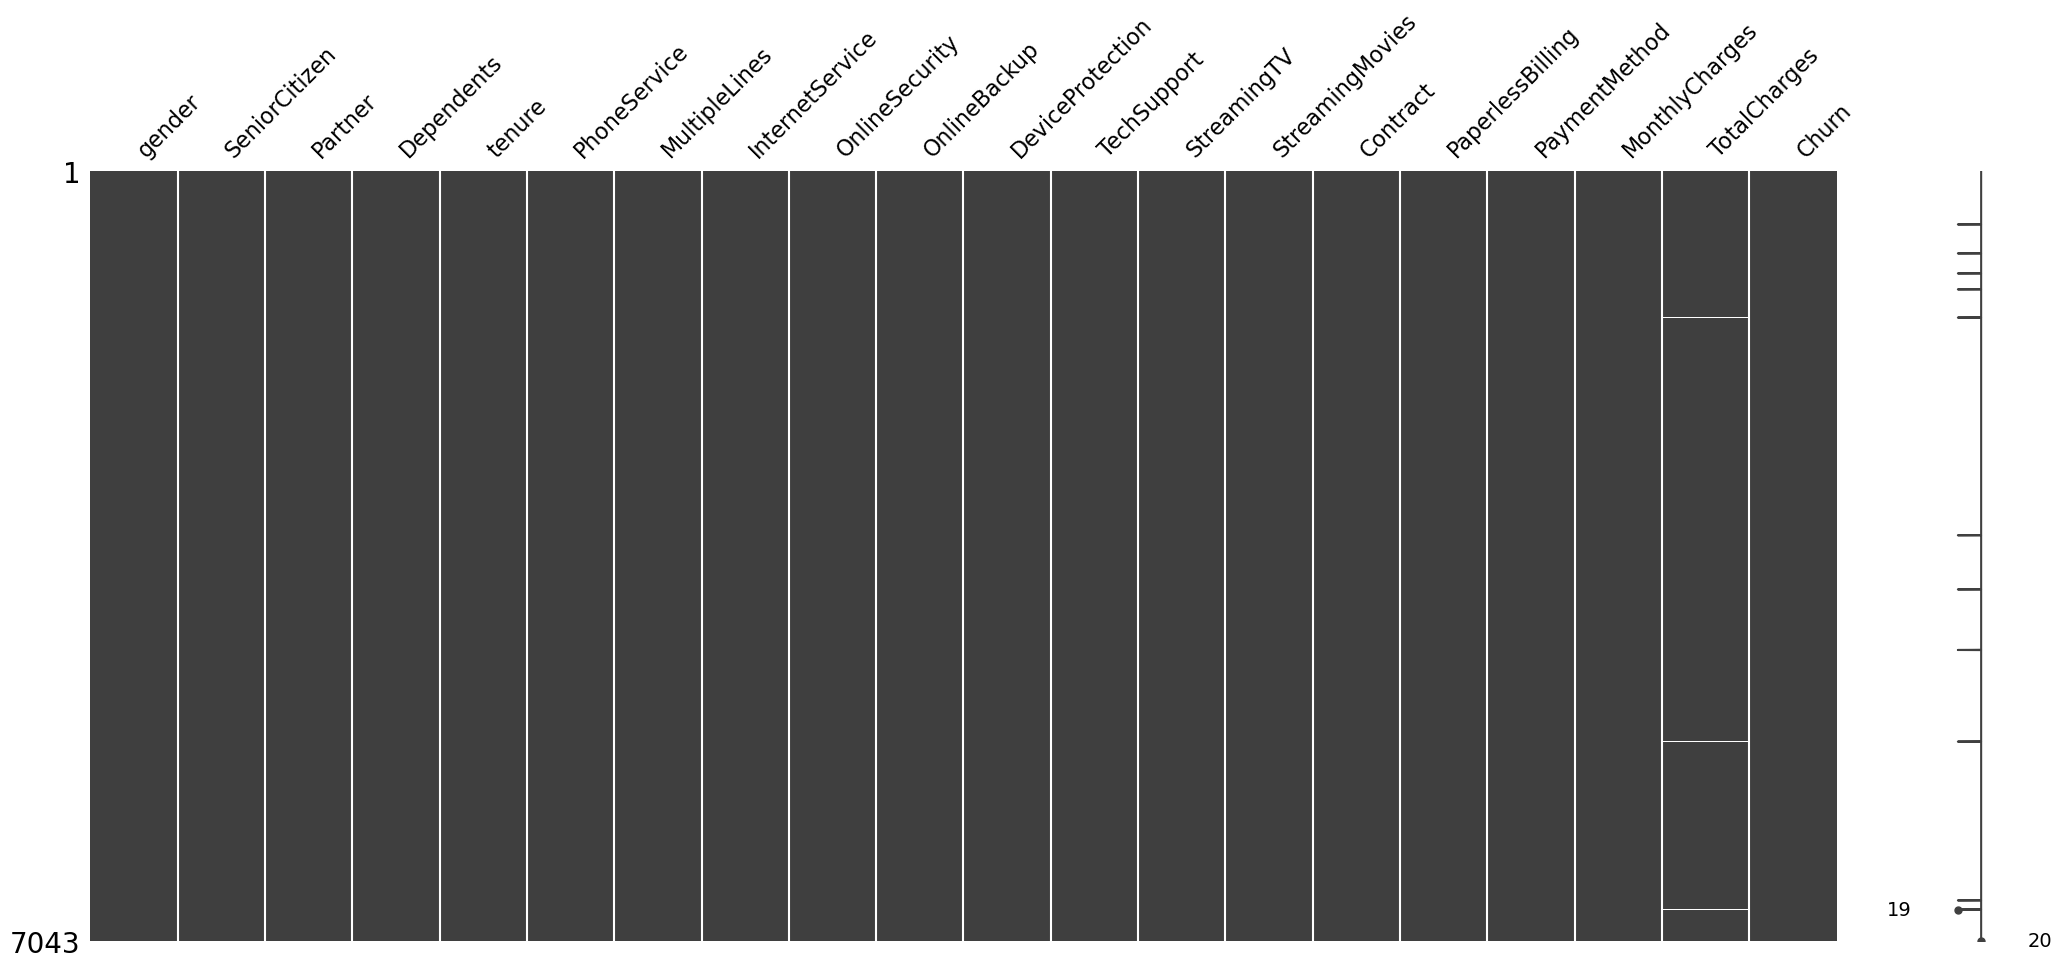

In [301]:
# Visualisasi data missing

msno.matrix(df)
plt.show()

Melihat hasil visualisasi, data hanya hilang pada kolom TotalCharges tanpa pola yang tidak tentu, kemungkinan data yang hilang berupa data MCAR atau MAR.

In [302]:
# Menampilkan data yang hilang

df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Dari hasil penampilan data yang null ini, saya memiliki hipotesis bahwa nilai yang hilang ada pada pelanggan yang baru saja mulai menggunakan service Telecom Inc. (tenure = 0). Maka saya akan melakukan pengecekan pada kolom tenure, jika terdapat kolom TotalCharges yang terisi pada saat melakukan groupby ini, berarti data memang terhilang secara penuh acak. Jika tidak maka dapat disimpulkan bahwa nilai hilang ini berupa pelanggan baru yang belu dikenakan biaya tagihan bulanan.

In [303]:
# Menampilkan data dimana tenure = 0

df[df['tenure']==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Dari hasil menunjukan data yang null, data yang hilang hanya ada pada pengguna tenure = 0. Mereka adalah pelanggan yang baru menggunakan layanan perusahaan.

In [394]:
# Cek pola hasil pembagian TotalCharges dengan MonthlyCharges

df_temp = df.copy()

df_temp['TotalCharges/MonthlyCharges'] = np.floor(df_temp['TotalCharges']/df_temp['MonthlyCharges'])
df_temp[['TotalCharges/MonthlyCharges', 'tenure']]

,TotalCharges/MonthlyCharges,tenure
0,1.0,1
1,33.0,34
2,2.0,2
3,43.0,45
4,2.0,2
...,...,...
7038,23.0,24
7039,71.0,72
7040,11.0,11
7041,4.0,4


Melihat hasil pembagian TotalCharges dengan MonthlyCharges, terlihat ada sebuah pola dimana TotalCharges dibagi MonthlyCharges menghasilkan lama pelanggan berada atau menggunakan layanan Telecom.Inc. Dari hasil terdapat beberapa yang memberikan selisih 2 dengan 1 hal ini mungkin terjadi karena selain MonthlyCharges yang terdaftar, terdapat biaya lain yang tidak terlihat pada data. Maka dari itu, saya mereasa saya bisa memberikan TotalCharges 0 pada kolom missing yang ada karena pelanggan tersebut adalah pelanggan baru yang belum membayar tagihan mereka.

## D. Cek Duplikat

In [304]:
# Mengecek nilai duplikat yang ada

df.duplicated().sum()

np.int64(22)

Terdapat 22 data duplikat, data tidak terlalu banyak sehingga akan saya drop kolom duplikat ini.

## E. Bagaimana Nilai Korelasi Untuk Setiap Feature Terhadap Target?

### a. Kolom Numerik

Karena pengecekan korelasi antara numerik dan kolom target yang berupa kategori, maka saya akan gunakan metode Kendall untuk mengecek korelasi karena kolom target Churn hanya memiliki 2 kategori yaitu Yes atau No.

In [305]:
# Memanggil function untuk menghasilkan nilai korelasi

print("Nilai tau antara kolom numerik dengan kolom Churn lain adalah: \n", cc.calc_corr(df[num_list + ['Churn']], 'Churn', method = 'kendall'))

Nilai tau antara kolom numerik dengan kolom Churn lain adalah: 
             Kolom  Korelasi
0          tenure -0.302965
1  MonthlyCharges  0.150955
2    TotalCharges -0.187774


Key Findings:
- Ketiga kolom numerikal tidak memiliki korelasi yang kuat dengan target Churn
- Kolom tenure dan TotalCharges menandakan adanya sedikit korelasi negatif.
- Kolom MonthlyCharge sendiri yang memiliki korelasi positif.

### b. Kolom Kategorik

Untuk pengecekan kolom kategori ini karena target juga berupa kategori, maka akan saya gunakan Metode Chi-Squared dimana nilai Cramer V akan digunakan untuk mengetes seberapa kuat korelasi antara feature dengan target.

In [ ]:
# Menghitung nilai korelasi Cramer V

df_temp = df[cat_list].astype('object')
cramer_results = cc.calc_corr(df_temp, 'Churn', method='chi-squared')

# Tampilkan hasil dengan format lebih rapi
print("Nilai Cramer V antara kolom dengan Churn:\n")
cramer_results

Nilai Cramer V antara kolom dengan Churn:



,Kolom,Korelasi
0,gender,0.008291
1,SeniorCitizen,0.150453
2,Partner,0.150126
3,Dependents,0.163870
4,PhoneService,0.011398
5,MultipleLines,0.040109
6,InternetService,0.322455
7,OnlineSecurity,0.347400
8,OnlineBackup,0.292316
9,DeviceProtection,0.281580


Melihat hasil nilai korelasi dari perhitungan Metode Chi-Squared, nilai Cramer V yang didapat bervariasi. Sebuah feature memiliki korelasi yang moderat dengan tarhet jika nilainya berada pada jangkauan 0.3 hingga 0.6 dan kolom-kolom inilah yang akan saya gunakan dalam pembuatan model nanti. Dari hasil perhitungan, kolom yang memiliki nilai moderat dalam korelasinya ada:
1. InternetService
2. OnlineSecurity
3. TechSupport
4. Contract
5. PaymentMethod

Selain kelima kolom ini, kolom OnlineBackup dan DeviceProtection bisa menjadi pertimbangan untuk ditambahkan saat Feature Selection karena angka korelasinya yang sangat mendekati 0.3.

## F. Cek Outlier

In [310]:
# Cek Skew untuk menentukan cara mencari outlier

df[num_list].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [311]:
# Menghitung Outlier

not_skewed = num_list.copy()
not_skewed.remove('TotalCharges')

outlier_tr, ub_tr, lb_tr = od.tukey_rule(df, 'TotalCharges', threshold=1.5)
outlier_z, ub_z, lb_z = od.z_score(df, not_skewed)

print(f'''Upper Bound TotalCharges: {ub_tr}
Lower Bound TotalCharges: {lb_tr}
Total Outlier TotalCharges: {len(df[(df['TotalCharges']<lb_tr) | (df['TotalCharges']>ub_tr)])}\n''')

for cols in num_list:
    if cols != 'TotalCharges':
        print(f'''Upper Bound {cols}: {ub_z[cols]}
Lower Bound {cols}: {lb_z[cols]}
Total Outlier {cols}: {len(df[(df[cols]<lb_z[cols]) | (df[cols]>ub_z[cols])])}\n''')

Upper Bound TotalCharges: 8884.66875
Lower Bound TotalCharges: -4688.481250000001
Total Outlier TotalCharges: 0

Upper Bound tenure: 106.0495917275249
Lower Bound tenure: -41.30729441104045
Total Outlier tenure: 0

Upper Bound MonthlyCharges: 155.0318337536348
Lower Bound MonthlyCharges: -25.508448832436443
Total Outlier MonthlyCharges: 0



Dari hasil perhitungan outlier dimana kolom TotalCharges menggunakan Tukey's Rule dan kolom tenure dan MonthlyCharges menggunakan Z-Score, data tidak memiliki outlier sehingga tidak perlu ada penanganan outlier.

## G. Cek Distribusi Target

In [312]:
# Mengecek distribusi target

df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Data imbalance. Untuk membantu performa model, saya akan menggunakan parameter class_weight='balance' untuk model klasifikasi yang akan digunakan.

## H. Apakah Pelanggan Berlangganan Streaming TV dan Streaming Movies Memiliki Tingkat Churn Lebih Rendah dibandingkan yang Tidak Berlangganan?

In [375]:
# Hitung jumlah churn per kategori layanan Streaming TV
streaming_tv_churn = df.groupby(["StreamingTV", "Churn"]).size().unstack()
streaming_tv_churn = streaming_tv_churn.div(streaming_tv_churn.sum(axis=1), axis=0) * 100  # Hitung persentase

# Hitung jumlah churn per kategori layanan Streaming Movies
streaming_movies_churn = df.groupby(["StreamingMovies", "Churn"]).size().unstack()
streaming_movies_churn = streaming_movies_churn.div(streaming_movies_churn.sum(axis=1), axis=0) * 100  # Hitung persentase

# Ubah ke format DataFrame untuk Plotly
streaming_tv_churn = streaming_tv_churn.reset_index().melt(id_vars="StreamingTV", var_name="Churn", value_name="Percentage")
streaming_movies_churn = streaming_movies_churn.reset_index().melt(id_vars="StreamingMovies", var_name="Churn", value_name="Percentage")

# Buat grouped bar chart untuk Streaming TV
fig_tv = px.bar(
    streaming_tv_churn,
    x="StreamingTV",
    y="Percentage",
    color="Churn",
    barmode="group",
    title="Persentase Churn Berdasarkan Layanan Streaming TV",
    labels={"Percentage": "Persentase (%)", "StreamingTV": "Streaming TV"},
    color_discrete_map={"No": "blue", "Yes": "red"}
)
fig_tv.show()

# Buat grouped bar chart untuk Streaming Movies
fig_movies = px.bar(
    streaming_movies_churn,
    x="StreamingMovies",
    y="Percentage",
    color="Churn",
    barmode="group",
    title="Persentase Churn Berdasarkan Layanan Streaming Movies",
    labels={"Percentage": "Persentase (%)", "StreamingMovies": "Streaming Movies"},
    color_discrete_map={"No": "blue", "Yes": "red"}
)
fig_movies.show()

Dari hasil grafik, tidak terlihat ada perbedaan signifikan atas pelanggan yang memiliki Streaming Service dengan yang tidak. Sepertinya keputusan churn pelanggan tidak terlalu dipengaruhi oleh layanan Streaming mereka.

## I. Bagaimana Distribusi Churn Terhadap Layanan OnlineSecurity, OnlineBackup, TechSupport?

In [380]:
# Pilih kolom yang relevan
cols = ['OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Churn']
df_filtered = df[cols]

# Ubah data dari kategori teks menjadi numerik
df_filtered = df_filtered.replace({'Churn': {'Yes': 1, 'No': 0}})

# Loop untuk membuat grafik stacked bar
for col in ['OnlineSecurity', 'OnlineBackup', 'TechSupport']:
    churn_counts = df_filtered.groupby(col)['Churn'].value_counts(normalize=True).unstack() * 100  # Hitung persen
    churn_counts = churn_counts.reset_index()

    # Plot dengan Plotly
    fig = px.bar(churn_counts, x=col, y=[0, 1], 
                 labels={'value': 'Persentase (%)', 'x': col}, 
                 title=f'Persentase Churn Berdasarkan {col}',
                 text_auto=True, color_discrete_map={0: 'blue', 1: 'red'})

    fig.update_layout(barmode='stack', yaxis=dict(title="Persentase (%)"))
    fig.show()


Berdasarkan hasil grafik, pelanggan yang mendapatkan layanan seperti TechSupport, OnlineBackup, dan OnlineSecurity lebih jarang melakukan Churn dibandingkan pelanggan yang tidak mendapatkan layanan sama sekali. Untuk ketiga kategori ini juga, tampaknya pelanggan yang tidak memiliki internet service juga tidak melakukan churn, hal ini mungkin terjadi karena pelanggan golongan ini hanya memerlukan layanan telepon saja dan tidak memedulikan layanan lainnya.

## J. Bagaimana Distribusi Metode Pembayaran Terhadap Pelanggan yang Churn?

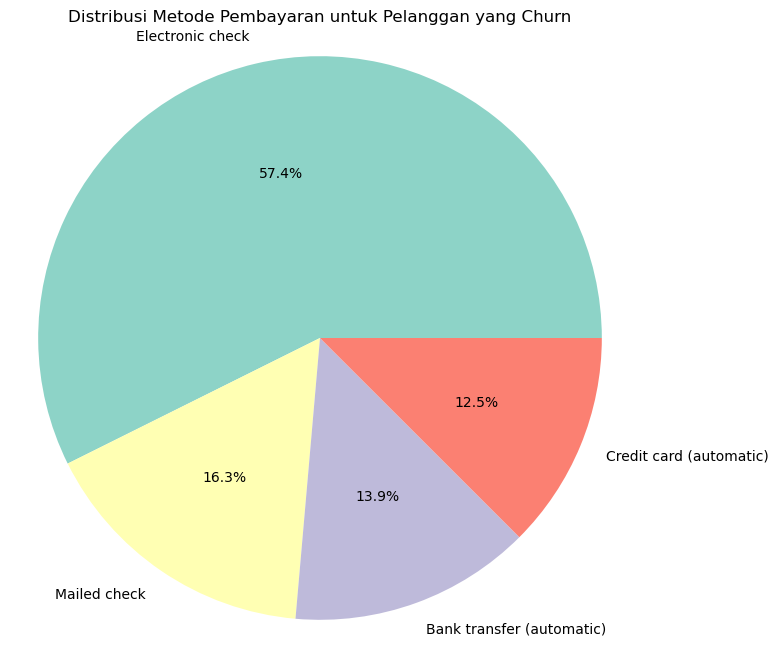

In [384]:
# Membuat pie chart

# Filter hanya pelanggan yang churn
df_churn_yes = df[df["Churn"] == "Yes"]

# Hitung jumlah churn berdasarkan metode pembayaran
payment_counts = df_churn_yes["PaymentMethod"].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors)
plt.title("Distribusi Metode Pembayaran untuk Pelanggan yang Churn")
plt.axis("equal")  # Menjaga bentuk pie tetap bulat

# Tampilkan chart
plt.show()

Melihat hasil visualisasi, pelanggan yang memilih untuk churn adalah pelanggan yang membayar menggunakan Electronic Check. Kemungkinan yang terpikir oleh saya kenapa metode ini mengalami churn tinggi adalah metode pembayaran ini tidak nyaman untuk digunakan atau mungkin sering terjadi kendala teknis yang membuat pelanggan tidak mau bertransaksi lagi.

**Rekomendasi:**</br>
Lakukan penyelidikan terhadap metode Electronic Check dan mengecek apakah pelanggan churn karena terdapat masalah teknis, biaya tambahan terlalu tinggi, atau faktor lain.

## K. Bagaimana Distribusi Kolom Numerik yang Ada?

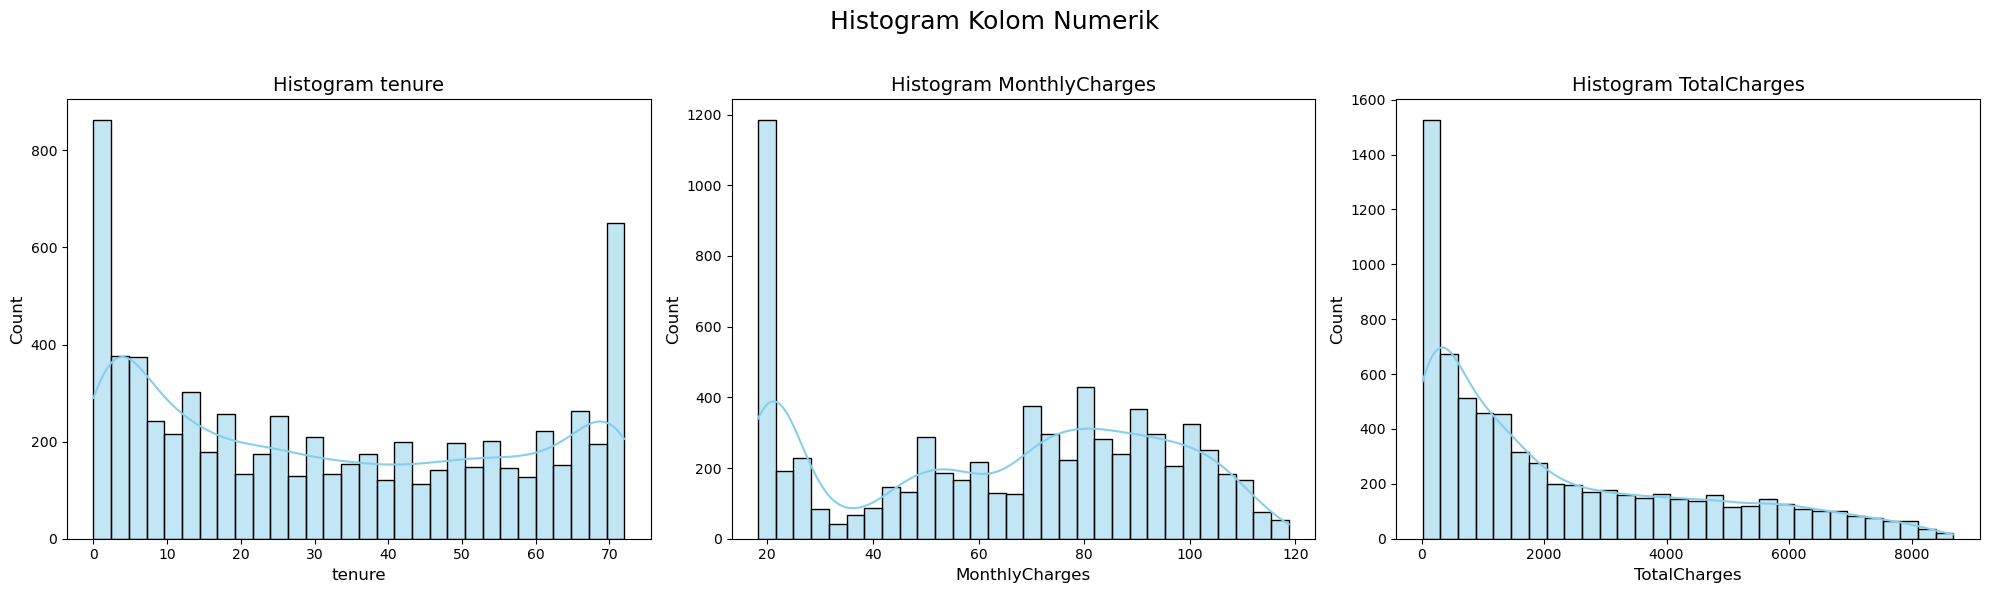

In [ ]:
# Membuat Visualisasi Histogram kolom numerik

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Histogram Kolom Numerik", fontsize=18)

for i, col in enumerate(num_list):
    ax = axes[i]
    sns.histplot(data=df, x=col, kde=True, bins=30, ax=ax, color="skyblue")
    ax.set_title(f"Histogram {col}", fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Melihat histogram yang ada beriku adalah beberapa key fingings yang saya temui:
- Pelanggan mayoritas ada pada tenure mendekati 0 bulan atau mendekati 70 bulan. Hal ini menandakan mayoritas pelanggan antara berupa pelanggan baru atau pelanggan yang memang sudah lama menggunakan service Telecom Inc.
- MonthlyCharges skewed ke arah kanan yang menandakan mayoritas pelangga memiliki biaya bulanan rendah (sekitar 40 kebawah).
- TotalCharges skewed ke arah kanan juga, hal ini mungkin disebabkan oleh datangnya banyak pelanggan baru.

## L. Bagaimana Distribusi Kolom Numerik Terhadap Kolom Churn?

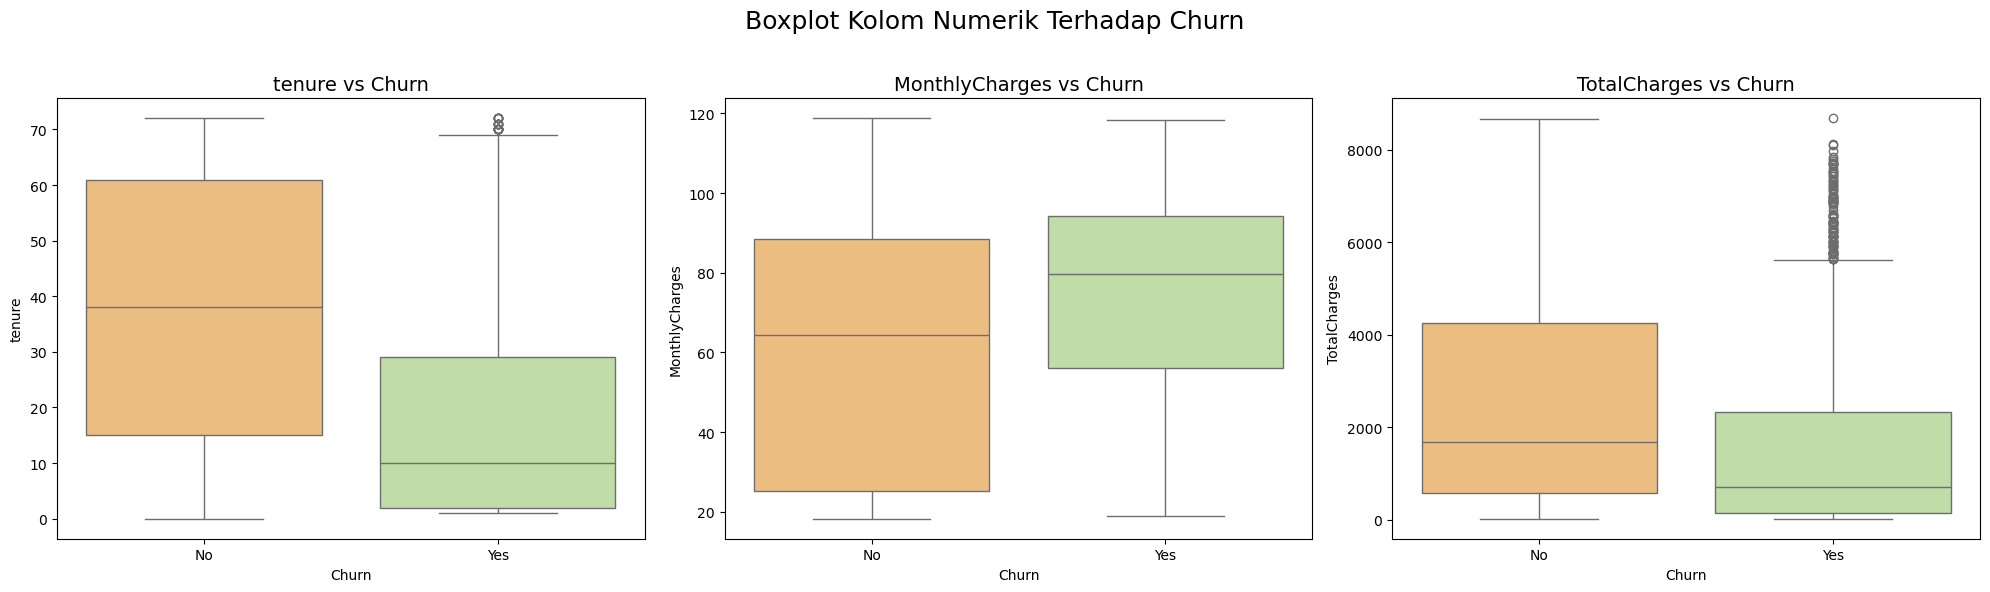

In [ ]:
# Membuat Visualisasi Boxplot kolom numerik

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Boxplot Kolom Numerik Terhadap Churn", fontsize=18)

for i, col in enumerate(num_list):
    sns.boxplot(x=df['Churn'], y=df[col], ax=axes[i], palette='Spectral', hue=df['Churn'])
    axes[i].set_title(f'{col} vs Churn', fontsize=14)
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Melihat hasil plotting boxplot, terlihat ada pengaruh lumayan signifikan antara kolom numerik dengan churn, hasil yang saya dapat adalah:
1. Semakin lama jangka tenure, pelanggan jarang churn.
2. Semakin tinggi harga MonthlyCharges, semakin tinggi juga kemungkinan pelanggan Churn.
3. Dari hasil TotalCharges, semakin tinggi semakin rendah kemungkinan mereka churn karena yang memiliki TotalCharges banyak ini adalah pelanggan yang sudah lama menggunaka service sehingga akumulasi TotalCharges juga semakin tinggi.

## M. Bagaimana Rasio Churn Terhadap Kolom Kategorik lain?

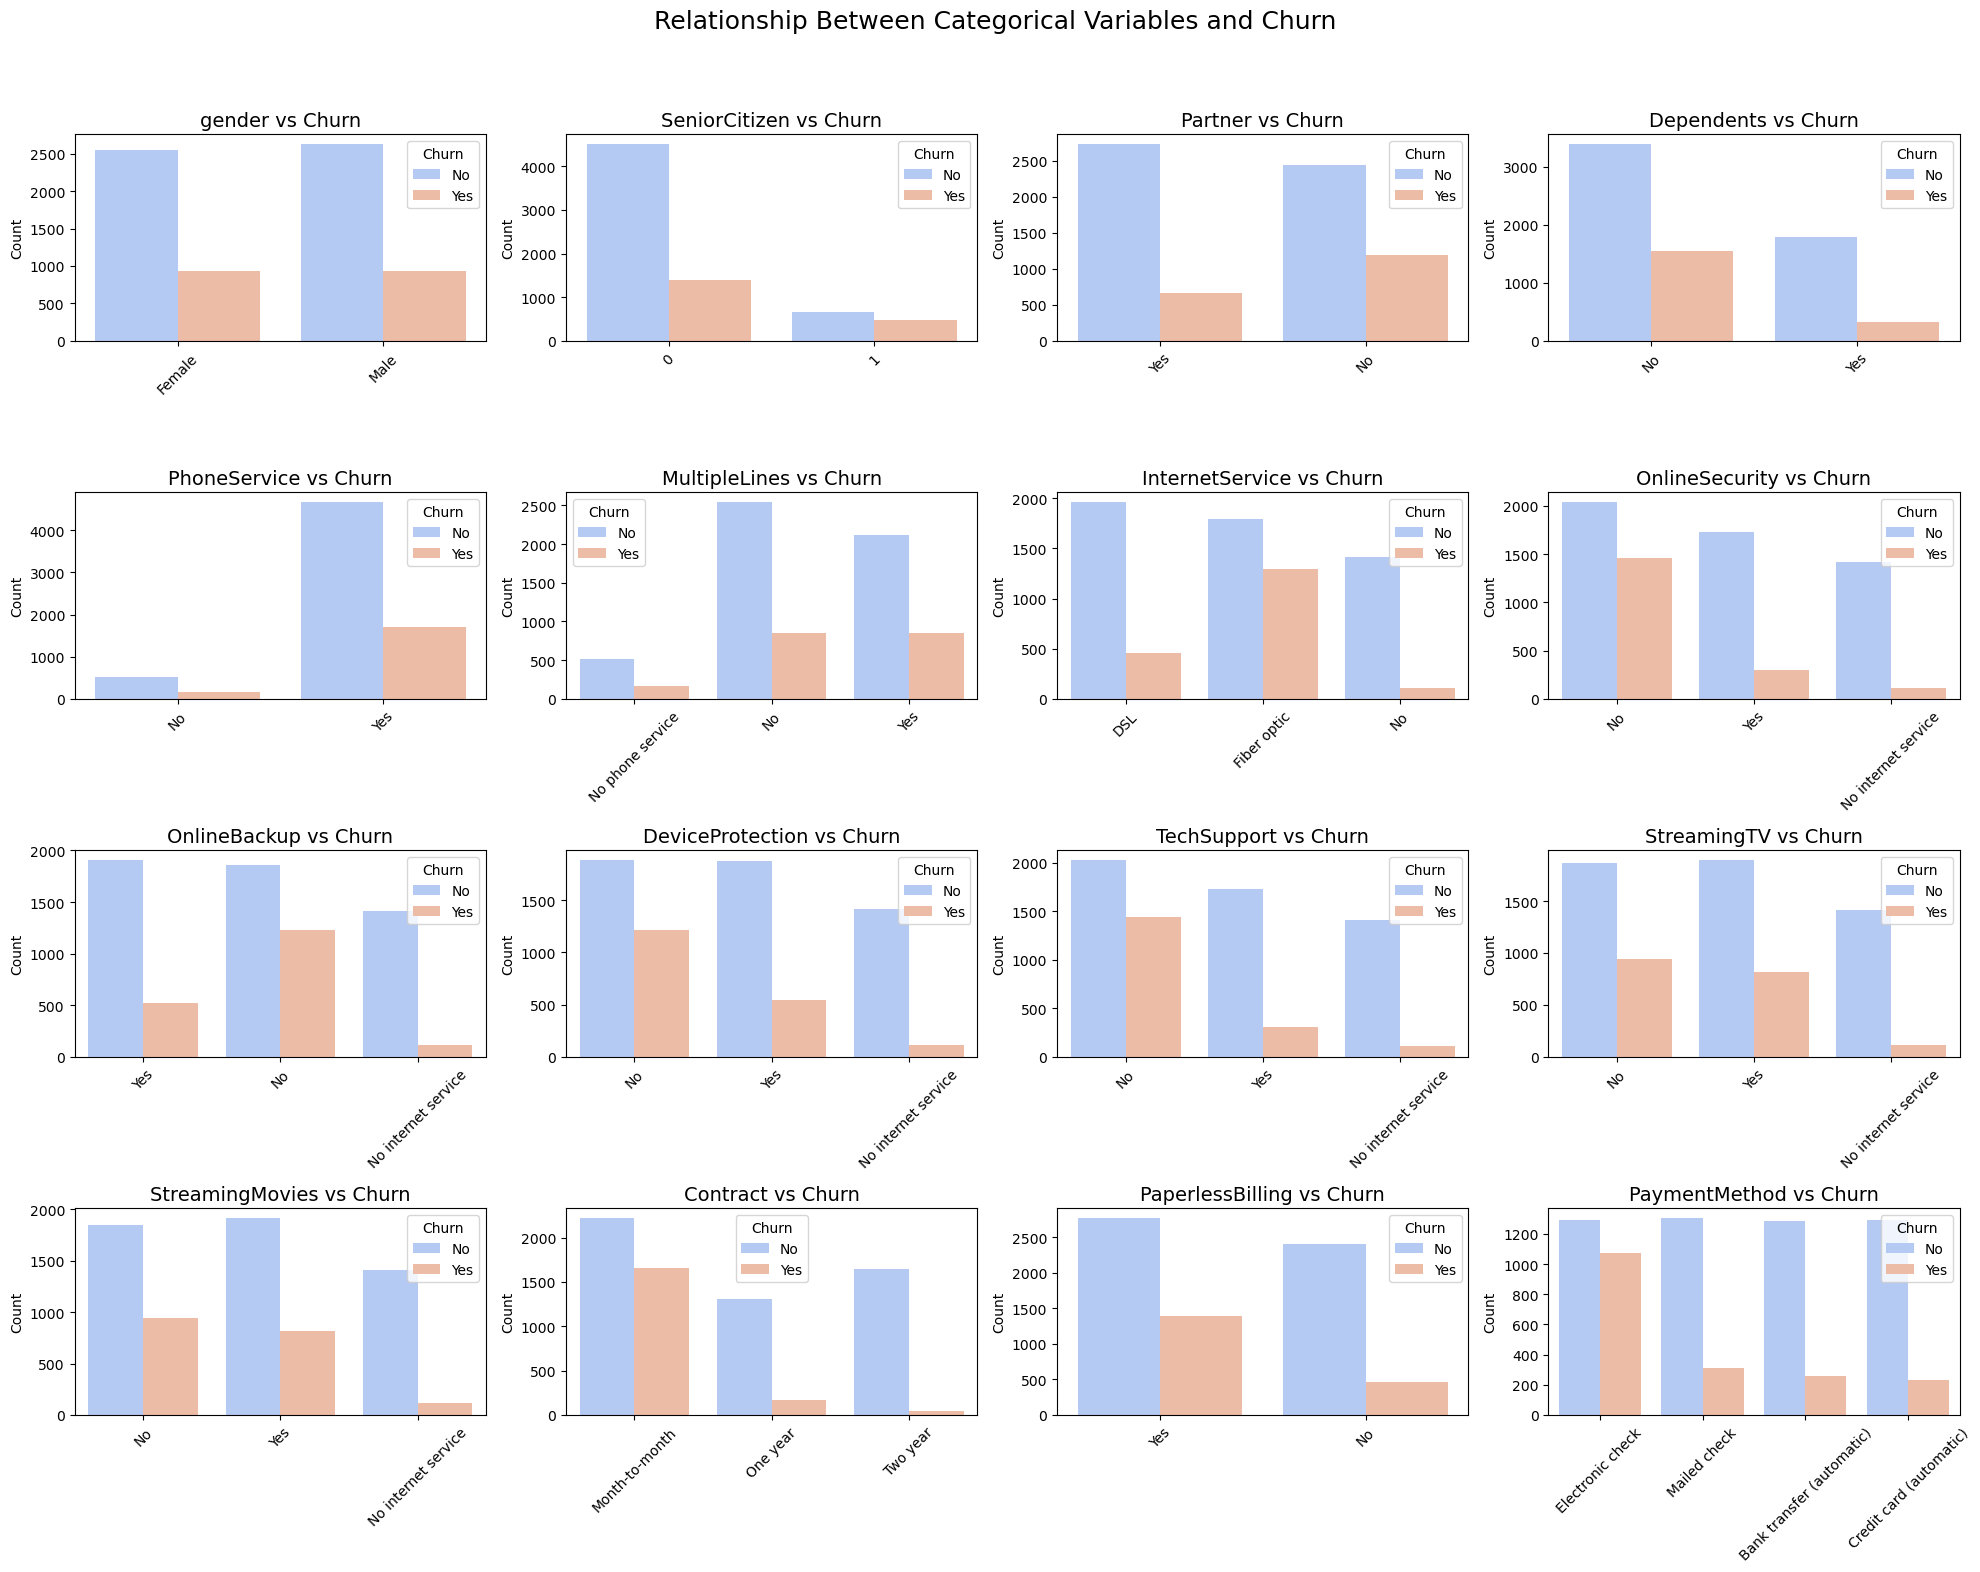

In [ ]:
# Visualisasi Churn terhadap kolom kategori.

fig, axes = plt.subplots(4, 4, figsize=(20, 16))
fig.suptitle("Relationship Between Categorical Variables and Churn", fontsize=18)

axes = axes.flatten()

# Membuat plot untuk setiap kolom terhadap Churn
for i, col in enumerate(df_temp):
    if col != 'Churn':
        sns.countplot(x=df[col], hue=df["Churn"], ax=axes[i], palette="coolwarm")
        axes[i].set_title(f"{col} vs Churn", fontsize=14)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Count")
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Melihat hasil visualisai, berikut adalah beberapa key findings saya:
1. Contract yang bertipe Month-to-month menghasilkan churn tertinggi.
2. Pelanggan yang menggunakan internet service Fiber Optic memiliki churn yang tinggi. Hal ini menandakan mungkin ada masalah pada layanan Fiber Optic
3. Pada kolom OnlineSecurity, OnlineBackup, DeviceProtection, dan TechSupport pelanggan yang tidak memilih untuk menggunakan layanan ini cenderung lebih memilih untuk churn.
4. PaymentMethod Electronic Check menghasilkan churn yang jauh lebih tinggi dibanding PaymentMethod lain.

# VI. Feature Engineering

## A. Duplicate Handling

In [313]:
# Menghapus nilai duplikat sebelum splitting

df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

## B. Split Train dan Test

In [314]:
# Split Feature dengan Target

x = df.drop(['Churn'], axis=1)
y = df['Churn'].map({'No' : 0, 'Yes' : 1})

In [315]:
# Split antara Train dengan Test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

print('Train size : ', x_train.shape)
print('Test size  : ', x_test.shape)

Train size :  (5616, 19)
Test size  :  (1405, 19)


## C. Missing Value Handling

Seperti yang telah saya temui pada saat EDA, saya akan mengisi nilai yang hilang pada kolom TotalCharges dengan angka 0 karena harga TotalCharges pelanggan adalah nilai yang proprosional berasal dari tenure * MonthlyCharges + Biaya Tambahan yang tidak terlihat. Karena saya tidak tahu apakah biaya tambahan ini berasal dari mana maka saya akan hiraukan saja karena kemungkian Biaya Tambahan ini bisa berupa biaya admin pada saat melakukan pembayaran yang tidak dapat saya cari tahu.

In [316]:
# Mengisi kolom TotalCharges yang hilang

x_train['TotalCharges'] = x_train['TotalCharges'].fillna(0)
x_test['TotalCharges'] = x_test['TotalCharges'].fillna(0)

# Cek Nilai missing value apakah berhasil diisi atau tidak
print(f'Total Nilai Null x_train: \n{x_train.isnull().sum()}')

Total Nilai Null x_train: 
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


In [317]:
# Cek Nilai missing value apakah berhasil diisi atau tidak
print(f'Total Nilai Null x_test:\n{x_test.isnull().sum()}')

Total Nilai Null x_test:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


## D. Feature Selection

Untuk feature yang akan saya gunakan, saya akan menggunakan semua fitur numerik karena walaupun nilai statistik korelasinya rendah, melihat hasil boxplot, terlihat adanya hubungan yang membuat pelanggan churn atau tidak. Untuk fitur kategorikal saya memutuskan untuk menambahkan feature OnlineBackup dan DeviceProtection.

In [318]:
# Memilih fitur yang akan digunakan dalam model

cat_cols = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaymentMethod']
num_cols = num_list

## E. Column Transformer

In [319]:
# Membuat column Transformer

transformer = ColumnTransformer([
    ('Num Cols', StandardScaler(), num_cols),
    ('Cat Cols', OrdinalEncoder(), cat_cols)
])

# VII. Modeling Part 1

Untuk melakukan modeling ini, berikut adalah beberapa model yang akan saya gunakan:
1. SVC
2. KNC
3. Decision Tree Classifier
4. Random Forest Classifier
5. XGBoost Classifier

Pada bagian pertama modeling ini, saya akan melakukan definisi model, training model, dan evaluasi model untuk setiap model yang akan saya gunakan. Karena kemungkinan overfitting bisa terjadi, terutama pada Decision Tree Classifier dan Random Forest Classifier, saya akan memberikan beberapa parameter awal pada baseline seluruh model dengan harapan mencegah terjadinya langsung overfitting yang terlalu berat (Perbedaan antara train dengan test sebesar 10% atau lebih).

Untuk evaluasi, saya akan menggunakan nilai Cross Validation dimana nilai mean yang mendekati 1 menandakan performa model yang bagus dan nilai standard deviasi mendekati 0 menandakan bahwa model stabil dalam arti prediksi model lebih konsisten dan tidak terlalu berpengaruh terhadap perubahan kecil data. Selain menggunakan nilai Cross Validation saya akan menggunakan nilai ROC-AUC untuk melihat performa model secara kesuluruhan tanpa memedulikan threshold karena nilai ROC-AUC mengukur kinerja model untuk semua possible threshold. Dan terakhir saya akan melakukan evaluasi menggunakan Classification Report Recall dimana angka yang mendekati 1 berarti semakin bagus model dalam menangkap hasil false negative yang terjadi.

## A. SVC

Model ini saya gunakan karena bersifat dapat menangani data non-linear karena memiliki kernel trick seperti Polynomial dan RBF. Dan untuk dataset saya yang memiliki jumlah data yang lumayan memiliki komputasi yang cepat.

<ul>
    <li>Kelebihan:</li>
    <ol>
        <li>Tahan terhadap data outlier jika ada dalam jumlah banyak.</li>
        <li>Dapat menangani data non-linear.</li>
        <li>Komputasi yang cepat.</li>
    </ol>
   <li>Kekurangan:</li>
    <ol>
        <li>Sulit menentukan hyperparameter yang optimal.</li>
        <li>Sulit diinterpretasikan dibandingkan Decision Tree ataupun Logistic Regression.</li>
        <li>Kesulitan ketika ada data imbalance</li>
    </ol>
</ul>

### a. Model Definition

In [320]:
# Membuat Pipeline untuk model

svc = Pipeline([
    ('Transformer', transformer),
    ('Model', SVC(class_weight='balanced', probability=True, C=3.0, kernel='poly', gamma='auto'))
])

svc

Pipeline(steps=[('Transformer',
                 ColumnTransformer(transformers=[('Num Cols', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('Cat Cols', OrdinalEncoder(),
                                                  ['InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaymentMethod'])])),
                ('Model',
                 SVC(C=3.0, class_weight='balanced', gamma='auto',
                     kernel='poly', probability=True))])

### b. Model Training

In [321]:
# Melakukan pelatihan model

svc.fit(x_train, y_train)

Pipeline(steps=[('Transformer',
                 ColumnTransformer(transformers=[('Num Cols', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('Cat Cols', OrdinalEncoder(),
                                                  ['InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaymentMethod'])])),
                ('Model',
                 SVC(C=3.0, class_weight='balanced', gamma='auto',
                     kernel='poly', probability=True))])

### c. Model Evaluation

In [322]:
def roc_auc_calc(model, x, y):
    '''Function ini bertugas dalam menghitung nilai ROC-AUC'''

    y_pred_proba = model.predict_proba(x)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    auc = roc_auc_score(y, y_pred_proba)
    return fpr, tpr, auc

In [323]:
def performance_check(model, X, y, classes):
  '''Function ini bertugas dalam menghasilkan confusion matrix dan menghasilkan nilai classification report'''
  
  y_pred = model.predict(X)
  print(classification_report(y, y_pred, target_names=classes))

#### i. Cross-Validation Score

In [324]:
# Membuat dictionary yang menyimpan nilai cross validation

cross_val = {
    'Model' : [],
    'Nilai Rata-Rata CV' : [],
    'Nilai Standard Deviasi CV' : []
}

In [325]:
# Menghitung nilai CV

cv_scores = cross_val_score(svc, x_train, y_train, cv=5, scoring='roc_auc')
print(f'Nilai Rata-Rata Cross Validation: {cv_scores.mean():.3f}')
print(f'Nilai Standard Deviasi Cross Validation: {cv_scores.std():.3f}')

Nilai Rata-Rata Cross Validation: 0.820
Nilai Standard Deviasi Cross Validation: 0.009


Hasil evaluasi menggunakan nilai cross validation memberikan hasil model yang memiliki performa bagus dan juga stabil.

In [326]:
# Menambahkan data cross validation

cross_val['Model'].append('SVC')
cross_val['Nilai Rata-Rata CV'].append(round(cv_scores.mean(), 3))
cross_val['Nilai Standard Deviasi CV'].append(round(cv_scores.std(), 3))

#### ii. ROC-AUC Score

Nilai AUC Train: 0.8418814767284274
Nilai AUC Test: 0.8206827894327893


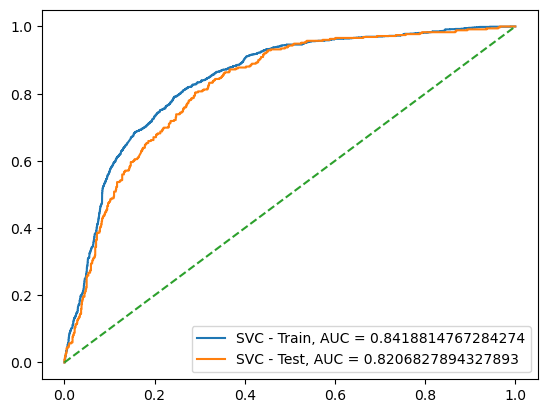

In [327]:
# Memanggil function untuk kalkulasi nilai ROC-AUC

fpr_train, tpr_train, auc_train = roc_auc_calc(svc, x_train, y_train)
fpr_test, tpr_test, auc_test = roc_auc_calc(svc, x_test, y_test)

print(f'Nilai AUC Train: {auc_train}')
print(f'Nilai AUC Test: {auc_test}')

# Membuat grafik ROC-AUC

plt.figure(0).clf()
plt.plot(fpr_train, tpr_train, label='SVC - Train, AUC = ' + str(auc_train))
plt.plot(fpr_test, tpr_test, label='SVC - Test, AUC = ' + str(auc_test))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=0)
plt.show()

Melihat hasil ROC-AUC, model berhasil melakukan prediksi dengan baik dengan perbedaan sebesar 0.02 untuk test. Ini berarti model termasuk good fit dengan hasil train dan test yang sama-sama tinggi.

#### iii. Classification Report

In [328]:
# Menampilkan classification report 

unique_value = y_train.unique().astype(str).tolist()

print('SVC - Train')
performance_check(svc, x_train, y_train, unique_value)
print('')

print('SVC - Test')
performance_check(svc, x_test, y_test, unique_value)

SVC - Train
              precision    recall  f1-score   support

           1       0.92      0.72      0.81      4111
           0       0.52      0.82      0.64      1505

    accuracy                           0.75      5616
   macro avg       0.72      0.77      0.72      5616
weighted avg       0.81      0.75      0.76      5616


SVC - Test
              precision    recall  f1-score   support

           1       0.92      0.70      0.79      1053
           0       0.47      0.81      0.59       352

    accuracy                           0.72      1405
   macro avg       0.69      0.75      0.69      1405
weighted avg       0.80      0.72      0.74      1405



Melihat hasil classification report, karena saya lebih ingin mempedulikan yang beneran churn, maka sebisa mungkin saya ingin mendapatkan false negative dimana prediksi tidak churn tetapi sebenarnya churn. Melihat hasil performa model, model SVC ini berhasil menangkap lumayan banyak false negative dengan perbedaan nilai sebesar 2%. Dalam kata lain model ini good fit.

## B. KNC

K-Nearest Classifier ini saya gunakan karena mudah dalam implementasinya dan karena tidak memerlukan waktu untuk training.

<ul>
    <li>Kelebihan:</li>
    <ol>
        <li>Sederehana dan mudah dipahami.</li>
        <li>Bisa untuk data non-linear.</li>
        <li>Tidak membutuhkan training.</li>
    </ol>
   <li>Kekurangan:</li>
    <ol>
        <li>Komputasi lama jika dataset besar.</li>
        <li>Sensitif terhadap skala data.</li>
        <li>Sulit menentukan nilai k yang optimal.</li>
        <li>Tidak dapat menangani data imbalance secara alami.</li>
    </ol>
</ul>

### a. Model Definition

In [329]:
# Membuat pipeline model

knc = Pipeline([
    ('Transformer', transformer),
    ('Model', KNeighborsClassifier(n_neighbors=11))
])

knc

Pipeline(steps=[('Transformer',
                 ColumnTransformer(transformers=[('Num Cols', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('Cat Cols', OrdinalEncoder(),
                                                  ['InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaymentMethod'])])),
                ('Model', KNeighborsClassifier(n_neighbors=11))])

### b. Model Training

In [330]:
# Melakukan fitting model

knc.fit(x_train, y_train)

Pipeline(steps=[('Transformer',
                 ColumnTransformer(transformers=[('Num Cols', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('Cat Cols', OrdinalEncoder(),
                                                  ['InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaymentMethod'])])),
                ('Model', KNeighborsClassifier(n_neighbors=11))])

### c. Model Evaluation

#### i. Cross Validation

In [331]:
# Menghitung nilai CV

cv_scores = cross_val_score(knc, x_train, y_train, cv=5, scoring='roc_auc')
print(f'Nilai Rata-Rata Cross Validation: {cv_scores.mean():.3f}')
print(f'Nilai Standard Deviasi Cross Validation: {cv_scores.std():.3f}')

Nilai Rata-Rata Cross Validation: 0.811
Nilai Standard Deviasi Cross Validation: 0.008


Model memiliki nilai bagus dan berdasarkan hasil standar deviasinya, model sangat stabil.

In [332]:
# Menambahkan data cross validation

cross_val['Model'].append('KNC')
cross_val['Nilai Rata-Rata CV'].append(round(cv_scores.mean(), 3))
cross_val['Nilai Standard Deviasi CV'].append(round(cv_scores.std(), 3))

#### ii. ROC-AUC Score

Nilai AUC Train: 0.8735259343904329
Nilai AUC Test: 0.8022479064145731


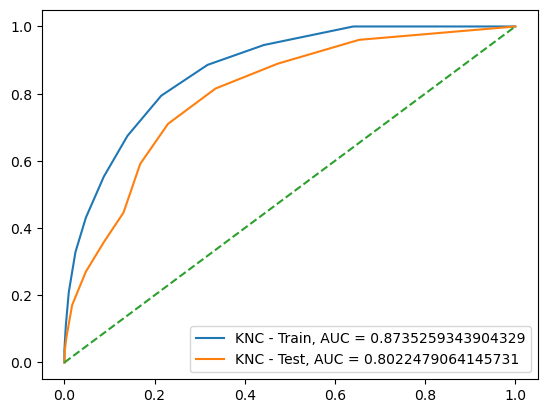

In [333]:
# Memanggil function untuk kalkulasi nilai ROC-AUC

fpr_train, tpr_train, auc_train = roc_auc_calc(knc, x_train, y_train)
fpr_test, tpr_test, auc_test = roc_auc_calc(knc, x_test, y_test)

print(f'Nilai AUC Train: {auc_train}')
print(f'Nilai AUC Test: {auc_test}')

# Membuat grafik ROC-AUC

plt.figure(0).clf()
plt.plot(fpr_train, tpr_train, label='KNC - Train, AUC = ' + str(auc_train))
plt.plot(fpr_test, tpr_test, label='KNC - Test, AUC = ' + str(auc_test))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=0)
plt.show()

Melihat hasil ROC-AUC model KNC ini mengalami overfitting sehingga masih diperlukannya hyperparameter tuning jika model ini ingin digunakan.

#### iii. Classification Report

In [334]:
# Menampilkan classification report 

unique_value = y_train.unique().astype(str).tolist()

print('KNC - Train')
performance_check(knc, x_train, y_train, unique_value)
print('')

print('KNC - Test')
performance_check(knc, x_test, y_test, unique_value)

KNC - Train
              precision    recall  f1-score   support

           1       0.85      0.91      0.88      4111
           0       0.70      0.55      0.62      1505

    accuracy                           0.82      5616
   macro avg       0.77      0.73      0.75      5616
weighted avg       0.81      0.82      0.81      5616


KNC - Test
              precision    recall  f1-score   support

           1       0.82      0.87      0.85      1053
           0       0.53      0.45      0.49       352

    accuracy                           0.76      1405
   macro avg       0.68      0.66      0.67      1405
weighted avg       0.75      0.76      0.76      1405



Melihat hasil classification report ini, model train berhasil menangkap mayoritas hasil prediksi false negative yang terjadi dengan train menghasilkan angka 91% dan Test menghasilkan angka 87%. Perbedaan antara train dan test 4% dari perbedaan ini model masih dapat di-tuning tetapi sudah tergolong good fit.

## C. Decision Tree Classifier

Decision Tree Classifier ini saya pilih karena model yang cepat dalam komputasinya dan juga tidak terpengaruh oleh missing value ataupun outlier.

<ul>
    <li>Kelebihan:</li>
    <ol>
        <li>Tidak dipengaruhi oleh outlier.</li>
        <li>Mudah dipahami dan dijelaskan.</li>
        <li>Komputasi lebih cepat jika dibanding dengan SVM.</li>
    </ol>
   <li>Kekurangan:</li>
    <ol>
        <li>Mudah overfit pada baseline.</li>
        <li>Tidak stabil jika ada perubahan data.</li>
        <li>Kurang baik jika terdapat banyak fitur kurang relevan.</li>
    </ol>
</ul>

### a. Model Definition

In [335]:
# Membuat model pipeline

dtc = Pipeline([
    ('Transformer', transformer),
    ('Model', DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_split=10, min_samples_leaf=5))
])

dtc

Pipeline(steps=[('Transformer',
                 ColumnTransformer(transformers=[('Num Cols', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('Cat Cols', OrdinalEncoder(),
                                                  ['InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaymentMethod'])])),
                ('Model',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                                        min_samples_leaf=5,
                                        min_samples_split=10))])

### b. Model Training

In [336]:
# Melakukan fitting model

dtc.fit(x_train, y_train)

Pipeline(steps=[('Transformer',
                 ColumnTransformer(transformers=[('Num Cols', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('Cat Cols', OrdinalEncoder(),
                                                  ['InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaymentMethod'])])),
                ('Model',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                                        min_samples_leaf=5,
                                        min_samples_split=10))])

### c. Model Evaluation

#### i. Cross Validation

In [337]:
# Menghitung nilai CV

cv_scores = cross_val_score(dtc, x_train, y_train, cv=5, scoring='roc_auc')
print(f'Nilai Rata-Rata Cross Validation: {cv_scores.mean():.3f}')
print(f'Nilai Standard Deviasi Cross Validation: {cv_scores.std():.3f}')

Nilai Rata-Rata Cross Validation: 0.825
Nilai Standard Deviasi Cross Validation: 0.012


Model memiliki nilai performa yang baik dan terlihat stabil walaupun tidak sestabil 2 model yang telah dicoba di atas.

In [338]:
# Menambahkan data cross validation

cross_val['Model'].append('DTC')
cross_val['Nilai Rata-Rata CV'].append(round(cv_scores.mean(), 3))
cross_val['Nilai Standard Deviasi CV'].append(round(cv_scores.std(), 3))

#### ii. ROC-AUC Score

Nilai AUC Train: 0.849255421197969
Nilai AUC Test: 0.8143979862729862


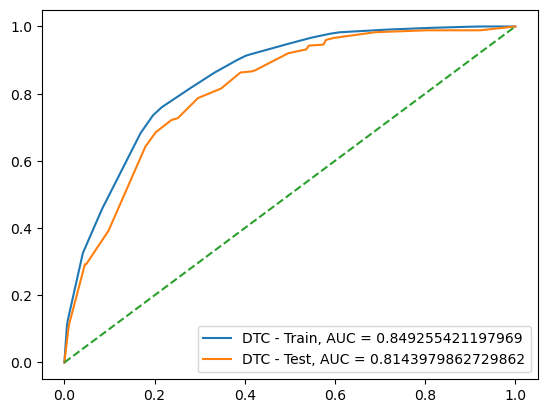

In [339]:
# Memanggil function untuk kalkulasi nilai ROC-AUC

fpr_train, tpr_train, auc_train = roc_auc_calc(dtc, x_train, y_train)
fpr_test, tpr_test, auc_test = roc_auc_calc(dtc, x_test, y_test)

print(f'Nilai AUC Train: {auc_train}')
print(f'Nilai AUC Test: {auc_test}')

# Membuat grafik ROC-AUC

plt.figure(0).clf()
plt.plot(fpr_train, tpr_train, label='DTC - Train, AUC = ' + str(auc_train))
plt.plot(fpr_test, tpr_test, label='DTC - Test, AUC = ' + str(auc_test))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=0)
plt.show()

Melihat hasil kurva ini, model berhasil dalam menangkap pola kelas yang ada dengan perbedaan antara train dan test sebesar 0.03. Model ini good fit dalam melakukan prediksi klasifikasi.

#### iii. Classification Report

In [340]:
# Menampilkan classification report 

unique_value = y_train.unique().astype(str).tolist()

print('DTC - Train')
performance_check(dtc, x_train, y_train, unique_value)
print('')

print('DTC - Test')
performance_check(dtc, x_test, y_test, unique_value)

DTC - Train
              precision    recall  f1-score   support

           1       0.90      0.78      0.84      4111
           0       0.56      0.76      0.65      1505

    accuracy                           0.78      5616
   macro avg       0.73      0.77      0.74      5616
weighted avg       0.81      0.78      0.79      5616


DTC - Test
              precision    recall  f1-score   support

           1       0.89      0.76      0.82      1053
           0       0.50      0.72      0.59       352

    accuracy                           0.75      1405
   macro avg       0.70      0.74      0.71      1405
weighted avg       0.79      0.75      0.76      1405



Melihat hasil recall untuk kelas 1 yang ada, antara test dengan train model ini memiliki performa bagus dalam menangkap false negative yang terjadi. Antara hasil test dengan train tidak berbeda jauh denan perbedaan sebesar 2%. Dari hasil perbandingan ini model ini tergolong good fit

## D. Random Forest Classifier

Random Forest saya pilih karena lebih akurat dan stabil dibandingkan Decision Tree karena berupa sebuah gabungan dari banyak pohon. Saya memilih odel ini juga karena lebih tahan terhadap overfitting.

<ul>
    <li>Kelebihan:</li>
    <ol>
        <li>Tahan terhadap outlier dan missing value.</li>
        <li>Tidak memerlukan scaling ataupun encoding.</li>
    </ol>
   <li>Kekurangan:</li>
    <ol>
        <li>Komputasi lebih lama dibandingkan Decision Tree karena model lebih kompleks.</li>
        <li>Meakan lebih banyak resource karena berupa banyak pohon.</li>
    </ol>
</ul>

### a. Model Definition

In [341]:
# Membuat model pipeline

rfc = Pipeline([
    ('Transformer', transformer),
    ('Model', RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_split=10, min_samples_leaf=5))
])

rfc

Pipeline(steps=[('Transformer',
                 ColumnTransformer(transformers=[('Num Cols', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('Cat Cols', OrdinalEncoder(),
                                                  ['InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaymentMethod'])])),
                ('Model',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        min_samples_leaf=5,
                                        min_samples_split=10))])

Untuk Random Forest, baseline akan saya samakan dengan Decision Tree Classifier dari awal.

### b. Model Training

In [342]:
# Melakukan fitting model

rfc.fit(x_train, y_train)

Pipeline(steps=[('Transformer',
                 ColumnTransformer(transformers=[('Num Cols', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('Cat Cols', OrdinalEncoder(),
                                                  ['InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaymentMethod'])])),
                ('Model',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        min_samples_leaf=5,
                                        min_samples_split=10))])

### c. Model Evaluation

#### i. Cross Validation

In [343]:
# Menghitung nilai CV

cv_scores = cross_val_score(rfc, x_train, y_train, cv=5, scoring='roc_auc')
print(f'Nilai Rata-Rata Cross Validation: {cv_scores.mean():.3f}')
print(f'Nilai Standard Deviasi Cross Validation: {cv_scores.std():.3f}')

Nilai Rata-Rata Cross Validation: 0.845
Nilai Standard Deviasi Cross Validation: 0.008


Model memiliki nilai performa bagus dan stabil dari hasil perhitungan cross validation.

In [344]:
# Menambahkan data cross validation

cross_val['Model'].append('RFC')
cross_val['Nilai Rata-Rata CV'].append(round(cv_scores.mean(), 3))
cross_val['Nilai Standard Deviasi CV'].append(round(cv_scores.std(), 3))

#### ii. ROC-AUC Score

Nilai AUC Train: 0.8602658292192327
Nilai AUC Test: 0.8406231114564447


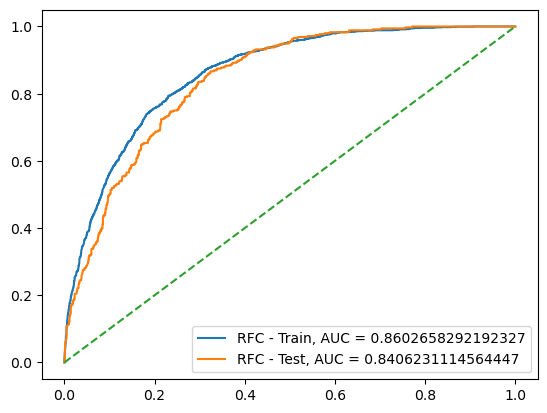

In [345]:
# Memanggil function untuk kalkulasi nilai ROC-AUC

fpr_train, tpr_train, auc_train = roc_auc_calc(rfc, x_train, y_train)
fpr_test, tpr_test, auc_test = roc_auc_calc(rfc, x_test, y_test)

print(f'Nilai AUC Train: {auc_train}')
print(f'Nilai AUC Test: {auc_test}')

# Membuat grafik ROC-AUC

plt.figure(0).clf()
plt.plot(fpr_train, tpr_train, label='RFC - Train, AUC = ' + str(auc_train))
plt.plot(fpr_test, tpr_test, label='RFC - Test, AUC = ' + str(auc_test))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=0)
plt.show()

Dari hasil nilai ROC-AUC curve ini, model dapat membedakan kelas 1 dengan kelas 0 dengan baik. Model memiliki nilai AUC-ROC sebesar 0.85 untuk train dan nilai 0.83. Selisih perbedaan performa ini sebesar 0.02, selisih yang tidak terlalu besar maka dapat dikatan model good fit.

#### iii. Classification Report

In [346]:
# Menampilkan classification report 

unique_value = y_train.unique().astype(str).tolist()

print('RFC - Train')
performance_check(rfc, x_train, y_train, unique_value)
print('')

print('RFC - Test')
performance_check(rfc, x_test, y_test, unique_value)

RFC - Train
              precision    recall  f1-score   support

           1       0.91      0.75      0.83      4111
           0       0.54      0.81      0.65      1505

    accuracy                           0.77      5616
   macro avg       0.73      0.78      0.74      5616
weighted avg       0.81      0.77      0.78      5616


RFC - Test
              precision    recall  f1-score   support

           1       0.91      0.73      0.81      1053
           0       0.49      0.78      0.60       352

    accuracy                           0.75      1405
   macro avg       0.70      0.76      0.71      1405
weighted avg       0.80      0.75      0.76      1405



Melihat hasil classification report, perbedaan antara recall test dengan train berbeda sebesar 2% sehingga tergolong good fit. Hasil classification report menunjukan bahwa train dan test cukup bagus dalam menangkap False Negative yang terjadi.

## E. XGBoost

XGBoost ini saya gunakan karena berupa model yang cepat dan efisien dalam komputasinya.

<ul>
    <li>Kelebihan:</li>
    <ol>
        <li>Cepat dan Efisien dalam segi resource dan komputasi.</li>
        <li>Mendukung data tidak seimbang.</li>
        <li>Dapat menangani data banyak dengan performa yang tinggi.</li>
    </ol>
   <li>Kekurangan:</li>
    <ol>
        <li>Lebih sulit untuk melakukan tuning model ini banding Random Forest.</li>
        <li>Jika dataset kecil, memerlukan resource lebih banyak.</li>
        <li>Interpretability yang kurang bagus dibandingkan dengan Decision Tree ataupun Random Forest.</li>
    </ol>
</ul>

### a. Model Definition

In [347]:
# Membuat model pipeline

xgb = Pipeline([
    ('Transformer', transformer),
    ('Model', XGBClassifier(scale_pos_weight=(5174/1869), learning_rate = 0.1, gamma=3, reg_alpha=0.01, eval_metric='logloss'))
])

xgb

Pipeline(steps=[('Transformer',
                 ColumnTransformer(transformers=[('Num Cols', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('Cat Cols', OrdinalEncoder(),
                                                  ['InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaymentMethod'])])),
                ('Model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               cols...
                               feature_types=None, gamma=3, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

### b. Model Training

In [348]:
# Melakukan fitting model

xgb.fit(x_train, y_train)

Pipeline(steps=[('Transformer',
                 ColumnTransformer(transformers=[('Num Cols', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('Cat Cols', OrdinalEncoder(),
                                                  ['InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaymentMethod'])])),
                ('Model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               cols...
                               feature_types=None, gamma=3, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

### c. Model Evaluation

#### i. Cross Validation Score

In [349]:
# Menghitung nilai CV

cv_scores = cross_val_score(xgb, x_train, y_train, cv=5, scoring='roc_auc')
print(f'Nilai Rata-Rata Cross Validation: {cv_scores.mean():.3f}')
print(f'Nilai Standard Deviasi Cross Validation: {cv_scores.std():.3f}')

Nilai Rata-Rata Cross Validation: 0.844
Nilai Standard Deviasi Cross Validation: 0.012


Melihat nilai hasil nilai Cross Validation yang dihasilkan, model memiliki performa yang baik dan stabil.

In [350]:
# Menambahkan data cross validation

cross_val['Model'].append('XGBoost')
cross_val['Nilai Rata-Rata CV'].append(round(cv_scores.mean(), 3))
cross_val['Nilai Standard Deviasi CV'].append(round(cv_scores.std(), 3))

#### ii. ROC-AUC Score

Nilai AUC Train: 0.8987043916693808
Nilai AUC Test: 0.8320639622722956


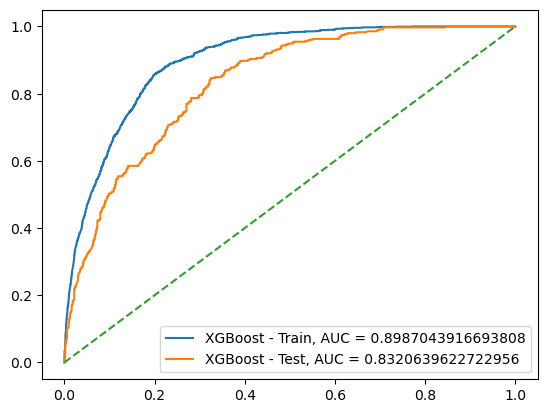

In [351]:
# Memanggil function untuk kalkulasi nilai ROC-AUC

fpr_train, tpr_train, auc_train = roc_auc_calc(xgb, x_train, y_train)
fpr_test, tpr_test, auc_test = roc_auc_calc(xgb, x_test, y_test)

print(f'Nilai AUC Train: {auc_train}')
print(f'Nilai AUC Test: {auc_test}')

# Membuat grafik ROC-AUC

plt.figure(0).clf()
plt.plot(fpr_train, tpr_train, label='XGBoost - Train, AUC = ' + str(auc_train))
plt.plot(fpr_test, tpr_test, label='XGBoost - Test, AUC = ' + str(auc_test))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=0)
plt.show()

Model memiliki performance yang baik tetapi terdapat perbedaan nilai antara train dengan tes yang besar. Selisih ini sebesar 0.06 sehingga tergolong overfit.

#### iii. Classification Report

In [352]:
# Menampilkan classification report 

unique_value = y_train.unique().astype(str).tolist()

print('XGBoost - Train')
performance_check(xgb, x_train, y_train, unique_value)
print('')

print('XGBoost - Test')
performance_check(xgb, x_test, y_test, unique_value)

XGBoost - Train
              precision    recall  f1-score   support

           1       0.94      0.78      0.86      4111
           0       0.60      0.87      0.71      1505

    accuracy                           0.81      5616
   macro avg       0.77      0.83      0.78      5616
weighted avg       0.85      0.81      0.82      5616


XGBoost - Test
              precision    recall  f1-score   support

           1       0.90      0.73      0.81      1053
           0       0.48      0.75      0.59       352

    accuracy                           0.74      1405
   macro avg       0.69      0.74      0.70      1405
weighted avg       0.79      0.74      0.75      1405



Dari hasil classification report ini, model mengalami overfit dengan perbedaan recall sebesar 5% antara train dengan test

## F. Evaluasi Model

Untuk melakukan model saving, saya akan mengecek performa setiap model dan lalu memilih model dengan nilai cross validation terbagus.

In [353]:
# Menampilkan hasil nilai cross validation dalam bentuk DataFrame

df_cross_val = pd.DataFrame(cross_val)
df_cross_val

,Model,Nilai Rata-Rata CV,Nilai Standard Deviasi CV
0,SVC,0.820,0.009
1,KNC,0.811,0.008
2,DTC,0.825,0.012
3,RFC,0.845,0.008
4,XGBoost,0.844,0.012


Melihat hasil nilai cross validation, dimana semua model telah saya berikan hyperparameter yang membantu mencegah overfitting untuk memberikan model kesempatan semaksimal mungkin untuk bekerja tanpa melakukan hyperparameter tuning, Random Forest Classifier (RFC) adalah model yang memberikan hasil performa terbaik dengan nilai rata-rata cross validation sebesar 0.845 dan nilai standard deviasi sebesar 0.008 yang menandakan model sangat stabil. Sehingga model Random Forest Classifier (RFC) ini lah yang akan saya lakukan hyperparameter tuning dan lalu menyimpan model terbaik antara yang telah diberikan hyperparameter tuning dengan yang tidak.

# VIII. Modeling Part 2

Pada bagian ini saya akan melakukan hyperparameter tuning untuk model yang telah dipilih dan lalu mengevaluasi model menggunakan hasil hyperparameter tuning.

## A. Hyperparameter Tuning

Untuk hyperparameter tuning ini, parameter yang akan saya tune adalah parameter yang awalnya saya gunakan pada model Random Forest yaitu:
1. max_depth
2. min_samples_split
3. min_samples_leaf
4. class_weight

Selain keempat hyperparameter tersebut saya juga akan menambahkan n_estimator. 

Berikut alasan saya memilih angka dan class hyperparameter tertentu:
1. n_estimators
    - 100 merupakan deault 
    - 200 Menghasilkan model lebih stabil
    - 300 menghasilkan model lebih akurat walaupun komputasi lebih lama

2. max_depth
    - None merupakan default 
    - 3 untuk membuat model lebih sederhana
    - 5 untuk menyeimbangkan over dan underfitting 
    - 10 untuk memberikan akurasi yang lebih walaupun model menjadi lebih kompleks

3. min_samples_split
    - 2 merupakan default
    - 5 mencegah model split terlalu cepat untuk mengurangi overfitting
    - 10 mencegah model menjadi terlalu kompleks

4. min_samples_leaf
    - 1 merupakan default
    - 3, 5, dan 7 merupakan tingkat generalisasi model dimana angka ini menunjukan minimal jumlah sampel tertentu.

5. class_weight
    - None merupakan default dan tidak mempertimbangkan distribusi kelas
    - balanced akan menyesuaikan bobot kelas berdasarkan distribusi data untuk menagani masalah imbalance.

In [ ]:
# Parameter yang akan ditune
param = {
    'Model__n_estimators': [100, 200, 300], 
    'Model__max_depth': [None, 3, 5, 10], 
    'Model__min_samples_split': [2, 5, 10],
    'Model__min_samples_leaf': [1, 3, 5, 7],
    'Model__class_weight': [None, 'balanced']
}

# Randomized Search
rfc_tuned = GridSearchCV(
    rfc, 
    param_grid=param, 
    scoring='roc_auc',
    cv=5,
    verbose=1, 
    n_jobs=-1,
)

# Fit ke data training
rfc_tuned.fit(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Transformer',
                                        ColumnTransformer(transformers=[('Num '
                                                                         'Cols',
                                                                         StandardScaler(),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('Cat '
                                                                         'Cols',
                                                                         OrdinalEncoder(),
                                                                         ['InternetService',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'Contract',
                                                                          'PaymentMethod'])])),
                                       ('Model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               max_depth=5,
                                                               min_samples_leaf=5,
                                                               min_samples_split=10))]),
             n_jobs=-1,
             param_grid={'Model__class_weight': [None, 'balanced'],
                         'Model__max_depth': [None, 3, 5, 10],
                         'Model__min_samples_leaf': [1, 3, 5, 7],
                         'Model__min_samples_split': [2, 5, 10],
                         'Model__n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [361]:
# Tampilkan hasil terbaik

print("Best Params:", rfc_tuned.best_params_)
print("Best AUC Score:", rfc_tuned.best_score_)

Best Params: {'Model__class_weight': None, 'Model__max_depth': 5, 'Model__min_samples_leaf': 3, 'Model__min_samples_split': 5, 'Model__n_estimators': 300}
Best AUC Score: 0.8456454010868214


## B. Hyperparameter Tuning - Model Evaluation

### a. Cross Validation

#### i. Sebelum

In [362]:
# Menghitung nilai cross validation

cv_scores = cross_val_score(rfc, x_train, y_train, cv=5, scoring='roc_auc')
print(f'Nilai Rata-Rata Cross Validation: {cv_scores.mean():.3f}')
print(f'Nilai Standard Deviasi Cross Validation: {cv_scores.std():.3f}')

Nilai Rata-Rata Cross Validation: 0.845
Nilai Standard Deviasi Cross Validation: 0.008


Sebelum hyperparameter tuning, nilai rata-rata cross validationn tinggi dengan angka 0.845 yang menandakan performa bagus dan nilai standar deviasi 0.008 yang menandakan model stabil.

#### ii. Setelah

In [363]:
# Menghitung nilai cross validation

cv_scores = cross_val_score(rfc_tuned.best_estimator_, x_train, y_train, cv=5, scoring='roc_auc')
print(f'Nilai Rata-Rata Cross Validation: {cv_scores.mean():.3f}')
print(f'Nilai Standard Deviasi Cross Validation: {cv_scores.std():.3f}')

Nilai Rata-Rata Cross Validation: 0.845
Nilai Standard Deviasi Cross Validation: 0.008


Setelah hyperparameter tuning, nilai rata-rata cross validationn tinggi dengan angka 0.845 yang menandakan performa bagus dan nilai standar deviasi 0.008 yang menandakan model stabil.

#### iii. Kesimpulan

Dari hasil hyperparameter tuning, nilai cross validation tidak berubah.

### b. ROC-AUC Score

#### i. Sebelum

Nilai AUC Train: 0.8602658292192327
Nilai AUC Test: 0.8406231114564447


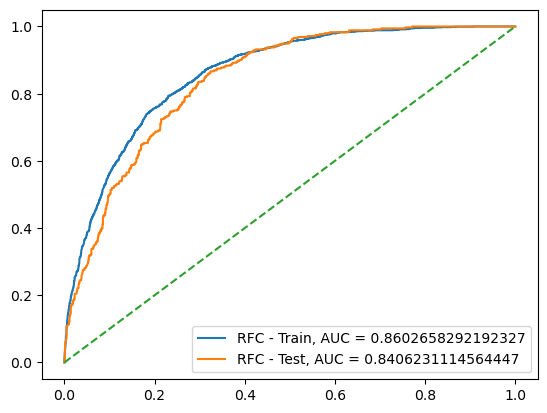

In [364]:
# Memanggil function untuk kalkulasi nilai ROC-AUC

fpr_train, tpr_train, auc_train = roc_auc_calc(rfc, x_train, y_train)
fpr_test, tpr_test, auc_test = roc_auc_calc(rfc, x_test, y_test)

print(f'Nilai AUC Train: {auc_train}')
print(f'Nilai AUC Test: {auc_test}')

# Membuat grafik ROC-AUC

plt.figure(0).clf()
plt.plot(fpr_train, tpr_train, label='RFC - Train, AUC = ' + str(auc_train))
plt.plot(fpr_test, tpr_test, label='RFC - Test, AUC = ' + str(auc_test))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=0)
plt.show()

Score ROC-AUC tingg dengan nilai 0.86 untuk train set dan 0.84 untuk test set.

#### ii. Sesudah

Nilai AUC Train: 0.8601555182554543
Nilai AUC Test: 0.8413151277734611


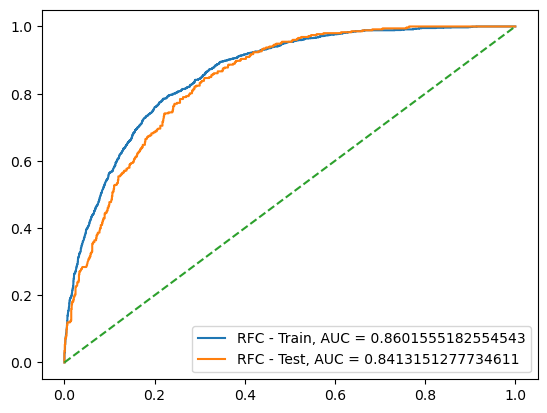

In [365]:
# Memanggil function untuk kalkulasi nilai ROC-AUC

fpr_train, tpr_train, auc_train = roc_auc_calc(rfc_tuned.best_estimator_, x_train, y_train)
fpr_test, tpr_test, auc_test = roc_auc_calc(rfc_tuned.best_estimator_, x_test, y_test)

print(f'Nilai AUC Train: {auc_train}')
print(f'Nilai AUC Test: {auc_test}')

# Membuat grafik ROC-AUC

plt.figure(0).clf()
plt.plot(fpr_train, tpr_train, label='RFC - Train, AUC = ' + str(auc_train))
plt.plot(fpr_test, tpr_test, label='RFC - Test, AUC = ' + str(auc_test))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=0)
plt.show()

Setelah melakukan hyperparameter tuning, nilai ROC-AUC yang ada berupa 0.860 untuk train set dan 0.841 untuk test set.

#### iii. Kesimpulan

Hasil hyperparameter tuning menghasilkan peningkatan performa model sebesar 0.001. Peningkatan tidak signifikan.

### c. Classification Report

#### i. Sebelum

In [366]:
# Menampilkan classification report 

unique_value = y_train.unique().astype(str).tolist()

print('RFC - Train')
performance_check(rfc, x_train, y_train, unique_value)
print('')

print('RFC - Test')
performance_check(rfc, x_test, y_test, unique_value)

RFC - Train
              precision    recall  f1-score   support

           1       0.91      0.75      0.83      4111
           0       0.54      0.81      0.65      1505

    accuracy                           0.77      5616
   macro avg       0.73      0.78      0.74      5616
weighted avg       0.81      0.77      0.78      5616


RFC - Test
              precision    recall  f1-score   support

           1       0.91      0.73      0.81      1053
           0       0.49      0.78      0.60       352

    accuracy                           0.75      1405
   macro avg       0.70      0.76      0.71      1405
weighted avg       0.80      0.75      0.76      1405



Sebelum melakukan hyperparameter tuning, model hanya dapat menangkap 75% false negative train set dan 73% false negative test set.

#### ii. Sesudah

In [367]:
# Menampilkan classification report 

unique_value = y_train.unique().astype(str).tolist()

print('RFC - Train')
performance_check(rfc_tuned.best_estimator_, x_train, y_train, unique_value)
print('')

print('RFC - Test')
performance_check(rfc_tuned.best_estimator_, x_test, y_test, unique_value)

RFC - Train
              precision    recall  f1-score   support

           1       0.83      0.93      0.87      4111
           0       0.70      0.47      0.56      1505

    accuracy                           0.80      5616
   macro avg       0.76      0.70      0.72      5616
weighted avg       0.79      0.80      0.79      5616


RFC - Test
              precision    recall  f1-score   support

           1       0.83      0.91      0.87      1053
           0       0.62      0.43      0.51       352

    accuracy                           0.79      1405
   macro avg       0.72      0.67      0.69      1405
weighted avg       0.77      0.79      0.78      1405



Setelah hyperparameter tuning, model dapat menangkap 93% nilai false negative pada train set dan 91% nilai false negative pada train set.

#### iii. Kesimpulan

Terdapat peningkatan drastis untuk kelas 1 (Churn) pada recall. Peningkatan ini sebesar 18% dari sebelumnya.

## C. Kesimpulan

Hasil hyperparameter tuning tidak memberikan peningkatan signifikan terhadap nilai cross validation ataupun ROC-AUC, tetapi hasil ini hyperparameter tuning memberikan pengaruh signifikan dalam membantu model mengidentifikasi hasil False Negative yang berupa hasl bagus karena rencana awal saya adalah untuk memfokuskan ke pelanggan yang diprediksi tidak Churn tetapi sebenarnya Churn. Maka dari itu, saya akan menyimpan model yang telah dilakukan hyperparameter tuning untuk digunakan dalam deployment

# IX. Model Saving

In [369]:
# Simpan model terbaik

joblib.dump(rfc_tuned.best_estimator_, "best_rfc_model.pkl")
print("Model berhasil disimpan!")

Model berhasil disimpan!


# X. Kesimpulan

## A. EDA

Dari hasil analisis yang saya lakukan, berikut adalah beberapa key findings yang saya dapatkan:
1. Pelanggan lebih cenderung tidak churn ketika mendapatkan layanan keamanan atau support.
2. Layanan Streaming tidak terlalu mempengaruhi keputusan pelanggan untuk churn.
3. Payment Method Electronic Check terlihat memiliki kendala sehingga menghasilkan Churn yang tinggi dari antara payment method lain.
4. Pelanggan yang terdaftar sekarang mayoritas adalah pelanggan baru.
5. Kolom tenure memiliki korelasi positif dengan TotalCharges menghasilkan semakin tinggi tenure, semakin TotalCharges.

## B. Model Evaluation

Dari hasil modeling yang telah dibuat, semua model dapat perform dengan baik dengan nilai performa yang baik dengan beberapa parameter yang telah ditentukan dari awal untuk membantu masalah overfitting dari awal. Dari hasil training Random Forest Classifier menghasilkan model dengan performa paling tinggi.

## C. Rekomendasi

Rekomendasi bisnis yang dapat saya berikan adalah:
1. Melakukan investigasi terhadap payment method Electronic Check untuk meihat masalah apa yang terdapat dari metode pembayaran ini untuk mencari tahu apa yang dapat dibetulkan atau apa yang dapat diperbagus.
2. Layanan Streaming bisa diperbagus untuk membantu retention pelanggan. Salah hal yang dapat dilakukan adalah meningkatkan kualitas dan menambahkan kuantitas konten.
3. Memberikan penawaran untuk pelanggan yang belum memiliki layanan keamanan seperti diskon atau free trial.
4. Membuat program reward berdasarkan tenure pelanggan.
5. Membuat paket bundling untuk layanan Streaming dan layanan Keamanan dan Support.

Rekomendasi untuk modeling kedepan:
1. Menggunakan hyperparameter lain selain n_neighbor untuk K-Nearest Classifier untuk membantu masalah overfitting.
2. Mencoba menggunakan teknik oversampling ataupun undersampling untuk mengatasi masalah imbalance daripada menggunakan class_weight = balance